# Introducción series temporales
Usar librerías 
pip install statsforecast mlforecast utilsforecast

In [22]:
import pandas as pd
df = pd.read_csv('./datasets/gdp_per_capita.csv', parse_dates=["date"])
df


,Country,Code,date,GDP,Growth,CPI,Imports,Exports,Population
0,Afghanistan,AFG,1960-01-01,5.377778e+08,NaN,NaN,7.024793,4.132233,8996351.0
1,Afghanistan,AFG,1961-01-01,5.488889e+08,NaN,NaN,8.097166,4.453443,9166764.0
2,Afghanistan,AFG,1962-01-01,5.466667e+08,NaN,NaN,9.349593,4.878051,9345868.0
3,Afghanistan,AFG,1963-01-01,7.511112e+08,NaN,NaN,16.863910,9.171601,9533954.0
4,Afghanistan,AFG,1964-01-01,8.000000e+08,NaN,NaN,18.055555,8.888893,9731361.0
...,...,...,...,...,...,...,...,...,...
15145,Zimbabwe,ZWE,2013-01-01,1.909102e+10,1.989493,109.079488,36.668735,21.987759,15054506.0
15146,Zimbabwe,ZWE,2014-01-01,1.949552e+10,2.376929,108.847215,33.741470,20.930146,15411675.0
15147,Zimbabwe,ZWE,2015-01-01,1.996312e+10,1.779873,106.224541,37.588635,19.160176,15777451.0
15148,Zimbabwe,ZWE,2016-01-01,2.054868e+10,0.755869,104.560626,31.275493,19.943532,16150362.0


Columnas
- date: yyyy-mm-dd
- GDP: Producto interior brutal
- Growth: tasa de crecimiento del GDP respecto año anterior
- CPI: indice de precios al consumidor

> ** Pronosticar el PIB pér capita en Italia para los próximos 3 años

In [23]:
df_italia = df[df['Country'] == 'Italy'].reset_index().copy()
df_italia

,index,Country,Code,date,GDP,Growth,CPI,Imports,Exports,Population
0,6722,Italy,ITA,1960-01-01,4.038529e+10,NaN,4.147836,12.863110,12.497483,50199700.0
1,6723,Italy,ITA,1961-01-01,4.484276e+10,8.207246,4.232895,12.863047,12.792404,50536350.0
2,6724,Italy,ITA,1962-01-01,5.038389e+10,6.203650,4.431466,13.204959,12.670582,50879450.0
3,6725,Italy,ITA,1963-01-01,5.771074e+10,5.609728,4.761820,14.343577,12.164889,51252000.0
4,6726,Italy,ITA,1964-01-01,6.317542e+10,2.797702,5.043354,12.713442,12.818263,51675350.0
5,6727,Italy,ITA,1965-01-01,6.797815e+10,3.268024,5.271277,12.127049,14.289182,52112350.0
6,6728,Italy,ITA,1966-01-01,7.365487e+10,5.984794,5.394972,13.007313,14.698293,52519000.0
7,6729,Italy,ITA,1967-01-01,8.113312e+10,7.178612,5.596384,13.498603,14.463180,52900500.0
8,6730,Italy,ITA,1968-01-01,8.794223e+10,6.544555,5.667868,13.273304,15.240796,53235750.0
9,6731,Italy,ITA,1969-01-01,9.708508e+10,6.098060,5.818477,14.546485,15.844118,53537950.0


In [24]:
# Me piden el GDP per capita
df_italia['GDP_per_capita'] = df_italia['GDP']/df_italia['Population']
df_italia

,index,Country,Code,date,GDP,Growth,CPI,Imports,Exports,Population,GDP_per_capita
0,6722,Italy,ITA,1960-01-01,4.038529e+10,NaN,4.147836,12.863110,12.497483,50199700.0,804.492623
1,6723,Italy,ITA,1961-01-01,4.484276e+10,8.207246,4.232895,12.863047,12.792404,50536350.0,887.336745
2,6724,Italy,ITA,1962-01-01,5.038389e+10,6.203650,4.431466,13.204959,12.670582,50879450.0,990.260152
3,6725,Italy,ITA,1963-01-01,5.771074e+10,5.609728,4.761820,14.343577,12.164889,51252000.0,1126.019337
4,6726,Italy,ITA,1964-01-01,6.317542e+10,2.797702,5.043354,12.713442,12.818263,51675350.0,1222.544540
5,6727,Italy,ITA,1965-01-01,6.797815e+10,3.268024,5.271277,12.127049,14.289182,52112350.0,1304.453817
6,6728,Italy,ITA,1966-01-01,7.365487e+10,5.984794,5.394972,13.007313,14.698293,52519000.0,1402.442354
7,6729,Italy,ITA,1967-01-01,8.113312e+10,7.178612,5.596384,13.498603,14.463180,52900500.0,1533.692877
8,6730,Italy,ITA,1968-01-01,8.794223e+10,6.544555,5.667868,13.273304,15.240796,53235750.0,1651.939377
9,6731,Italy,ITA,1969-01-01,9.708508e+10,6.098060,5.818477,14.546485,15.844118,53537950.0,1813.388126


In [25]:
df_italia = df_italia[['Country','date','GDP_per_capita']].copy()
df_italia.rename(columns={'Country':'unique_id', 'date':'ds', 'GDP_per_capita':'y'}, inplace=True)
df_italia

,unique_id,ds,y
0,Italy,1960-01-01,804.492623
1,Italy,1961-01-01,887.336745
2,Italy,1962-01-01,990.260152
3,Italy,1963-01-01,1126.019337
4,Italy,1964-01-01,1222.544540
5,Italy,1965-01-01,1304.453817
6,Italy,1966-01-01,1402.442354
7,Italy,1967-01-01,1533.692877
8,Italy,1968-01-01,1651.939377
9,Italy,1969-01-01,1813.388126


In [26]:
df_italia.isna().sum()

unique_id    0
ds           0
y            0
dtype: int64

In [27]:
df_italia = df_italia.sort_values(by='ds', ascending=True)
df_italia

,unique_id,ds,y
0,Italy,1960-01-01,804.492623
1,Italy,1961-01-01,887.336745
2,Italy,1962-01-01,990.260152
3,Italy,1963-01-01,1126.019337
4,Italy,1964-01-01,1222.544540
5,Italy,1965-01-01,1304.453817
6,Italy,1966-01-01,1402.442354
7,Italy,1967-01-01,1533.692877
8,Italy,1968-01-01,1651.939377
9,Italy,1969-01-01,1813.388126


Text(0, 0.5, 'Ingreso pér capita')

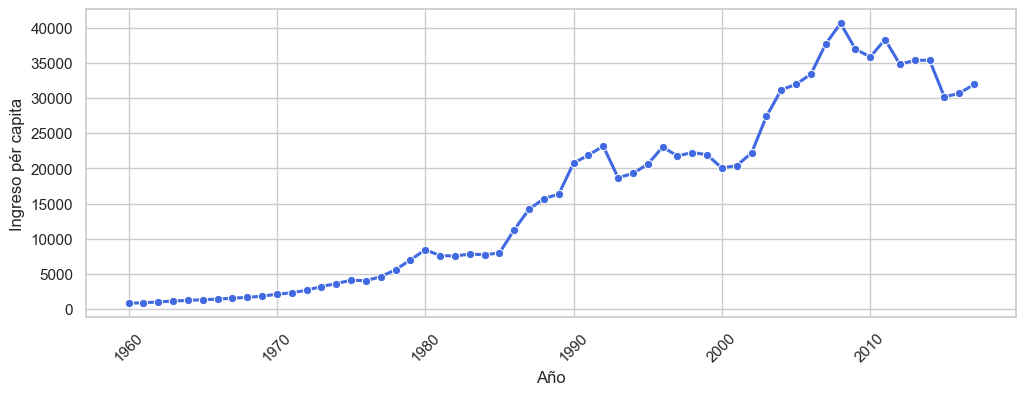

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
sns.set_palette("coolwarm")
fig, ax = plt.subplots(1,figsize=(12,4))
ax = sns.lineplot(data=df_italia, x='ds', y='y', marker='o', linewidth=2.2, markersize=6, color="royalblue")
ax.grid(True)
ax.set_xlabel('Año')
ax.tick_params(axis="x", rotation=45)
ax.set_ylabel('Ingreso pér capita')


**Marco Dijo...**
- Cuidado con la estacionalidad. Voy a hacer una regresión. Si hubiera estacionalidad o componentes cíclicos me caeria con todo el equipo

MAÑANA hablamos de como detectarla

## Modelo más básico es una **regresión lineal**
$$y_{futuro} = m*t + b$$

In [29]:
x_train = df_italia[:54]
x_val = df_italia[54:]
x_val

,unique_id,ds,y
54,Italy,2014-01-01,35396.665724
55,Italy,2015-01-01,30180.321515
56,Italy,2016-01-01,30668.981429
57,Italy,2017-01-01,31952.975921


In [30]:
from mlforecast import MLForecast
from sklearn.linear_model import LinearRegression

def year(timestamp):
    return timestamp.year

fcst = MLForecast(
    models = [],    # preprocesado; no se usan modelos al preprocesar
    freq= 'YS',     # los datos tienen frecuencia anual (inicio de año)
    date_features = [year]
)

x_train = fcst.preprocess(x_train)

In [31]:
x_train

,unique_id,ds,y,year
0,Italy,1960-01-01,804.492623,1960
1,Italy,1961-01-01,887.336745,1961
2,Italy,1962-01-01,990.260152,1962
3,Italy,1963-01-01,1126.019337,1963
4,Italy,1964-01-01,1222.544540,1964
5,Italy,1965-01-01,1304.453817,1965
6,Italy,1966-01-01,1402.442354,1966
7,Italy,1967-01-01,1533.692877,1967
8,Italy,1968-01-01,1651.939377,1968
9,Italy,1969-01-01,1813.388126,1969


In [32]:
#Entrenar el modelo despues de preprocesar
fcst = MLForecast(
    models = [LinearRegression()], # Modelo de regresión lineal
    freq = 'YS',
    date_features=[year]
)

fcst.fit(x_train, static_features=[])

MLForecast(models=[LinearRegression], freq=YS, lag_features=[], date_features=[<function year at 0x000001BCF855BE20>], num_threads=1)

In [33]:
#Hacer la predicción
pron = fcst.predict(4)
pron

,unique_id,ds,LinearRegression
0,Italy,2014-01-01,36345.920686
1,Italy,2015-01-01,37118.092445
2,Italy,2016-01-01,37890.264204
3,Italy,2017-01-01,38662.435963


In [34]:
x_val

,unique_id,ds,y
54,Italy,2014-01-01,35396.665724
55,Italy,2015-01-01,30180.321515
56,Italy,2016-01-01,30668.981429
57,Italy,2017-01-01,31952.975921


In [35]:
#Medir error validación
x_val_pron = x_val.merge(pron)
from utilsforecast.losses import rmse
error = rmse(x_val_pron, models=['LinearRegression'])
error

,unique_id,LinearRegression
0,Italy,6045.608518


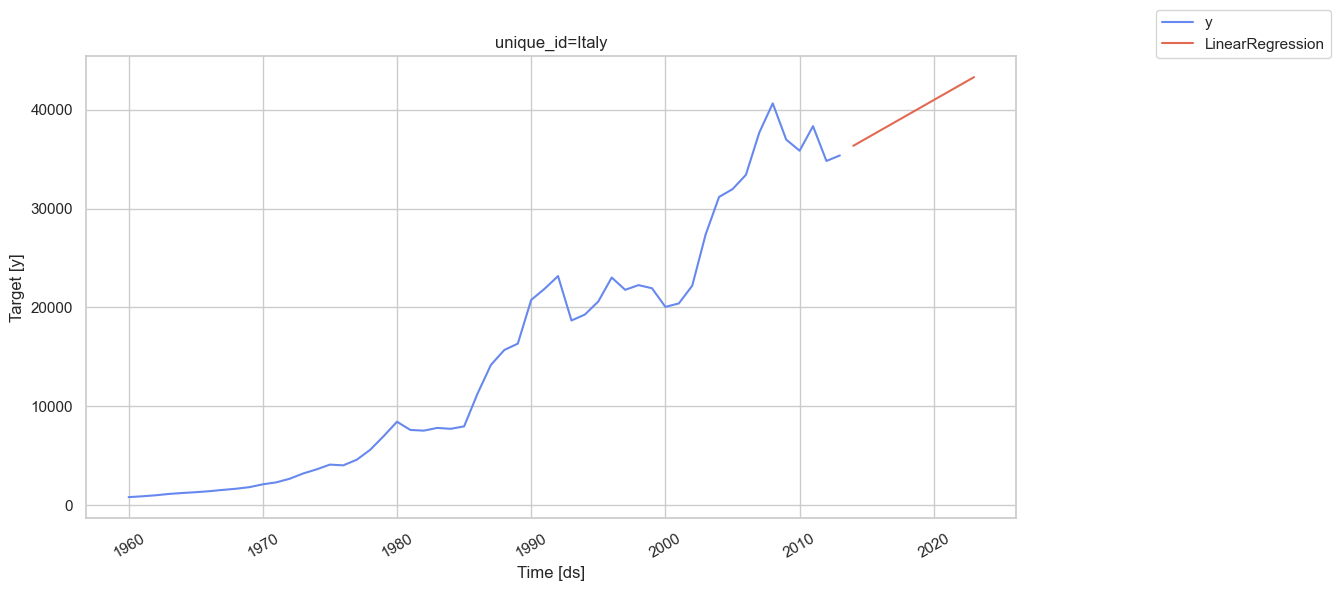

In [36]:
from utilsforecast.plotting import plot_series
pron = fcst.predict(10)
fig,ax = plt.subplots(figsize=(12,6))
plot_series(x_train, pron, ax=ax)
